In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# loading hyperspectral image HOUSTON DATASET 2013

hs = np.load('/Users/carlos-theran/Documents/famu-spring22/Mat4906-ML/project files/hs_houston.npy')

In [6]:
# number of row 349 and number of columns is 1905
print(type(hs))
print(hs.shape)
print(380*1050)
#plt.figure(figsize=(10,10))



<class 'numpy.ndarray'>
(144, 664845)
399000


In [27]:
# reshaping the hyperspectra image from bands x pixels into a cube row x columns x bands
hs_cube = np.reshape(hs.T,(349,1905,144))
print(hs_cube.shape)

(349, 1905, 144)


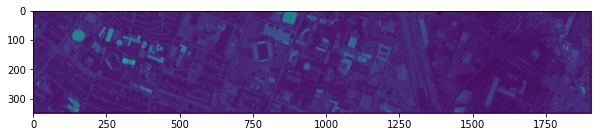

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(hs_cube[:,:,10])

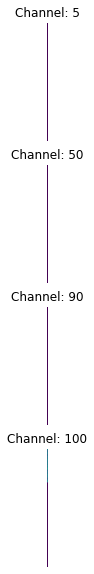

In [30]:
_, fig = plt.subplots(nrows=4, ncols=1, figsize=(10,10))
for ax, image, channel in zip(fig, hs_cube[:,:,(5,50,90,100)], [5,50,90,100]):
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title("Channel: %i" % channel)